#### Dataset Preparation


In [1]:
import numpy as np


np.random.seed(42)

In [2]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
dataset = load_wine()
x = dataset.data
y = dataset.target

#### CART Classifier


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [6]:
parameters = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 4, 8, 10],
}

clf = DecisionTreeClassifier()
grid_cv = GridSearchCV(clf, parameters, cv=10, n_jobs=-1)
_ = grid_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 8, 10]})

In [7]:
print(f"Parameters of best model: {grid_cv.best_params_}")
print(f"Score of best model: {grid_cv.best_score_}")

Parameters of best model: {'criterion': 'gini', 'max_depth': 4}
Score of best model: 0.9448717948717948


#### Train Best Model


In [8]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=5)
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)

print(f"Accuracy: {score}")

Accuracy: 0.9444444444444444


In [9]:
# graphviz
from sklearn.tree import plot_tree

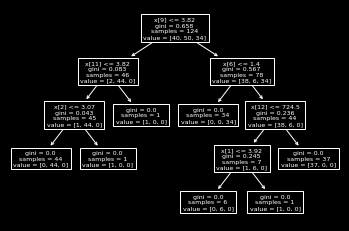

In [10]:
_ = plot_tree(clf)